# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [82]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [84]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(.1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hafar al-batin
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | berdigestyakh
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | kottayam
Processing Record 8 of Set 1 | bonthe
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | flying fish cove
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | xai-xai
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | kerikeri
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | sallanches
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | whitehorse
Processing Recor

In [85]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [86]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hafar al-batin,28.4328,45.9708,7.32,70,0,1.03,SA,1736901583
1,olonkinbyen,70.9221,-8.7187,-0.37,99,100,5.21,SJ,1736901661
2,berdigestyakh,62.0989,126.6992,-30.52,88,100,4.79,RU,1736901661
3,margaret river,-33.9500,115.0667,18.25,53,55,1.39,AU,1736901588
4,saint-philippe,-21.3585,55.7679,25.85,81,95,5.80,RE,1736901661


In [87]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [88]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hafar al-batin,28.4328,45.9708,7.32,70,0,1.03,SA,1736901583
1,olonkinbyen,70.9221,-8.7187,-0.37,99,100,5.21,SJ,1736901661
2,berdigestyakh,62.0989,126.6992,-30.52,88,100,4.79,RU,1736901661
3,margaret river,-33.9500,115.0667,18.25,53,55,1.39,AU,1736901588
4,saint-philippe,-21.3585,55.7679,25.85,81,95,5.80,RE,1736901661


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

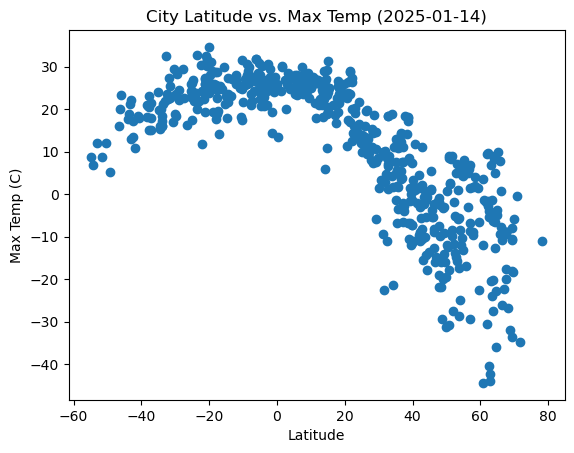

In [89]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
med_date = datetime.datetime.fromtimestamp(city_data_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temp ({day})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

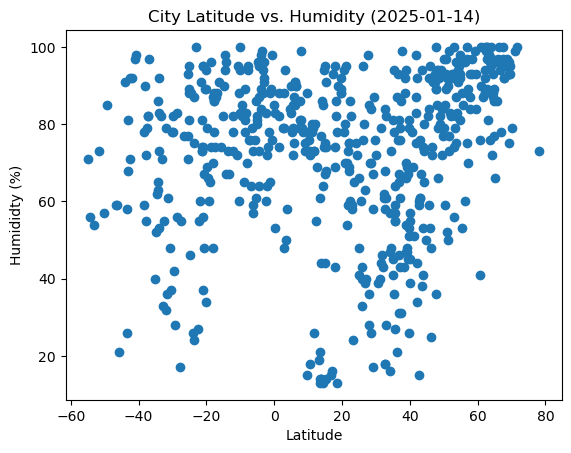

In [90]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
med_date = datetime.datetime.fromtimestamp(city_data_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({day})')
plt.xlabel('Latitude')
plt.ylabel('Humididty (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

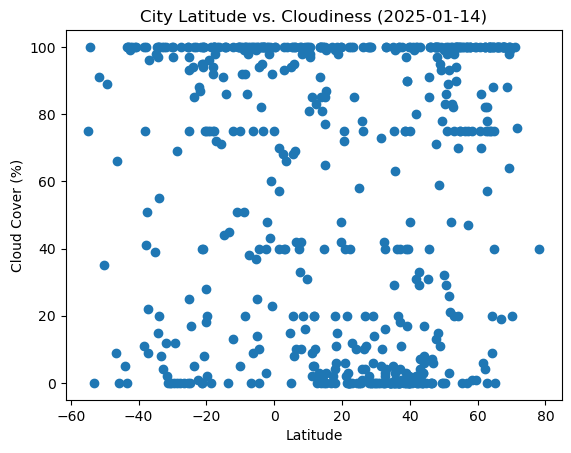

In [91]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
med_date = datetime.datetime.fromtimestamp(city_data_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({day})')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

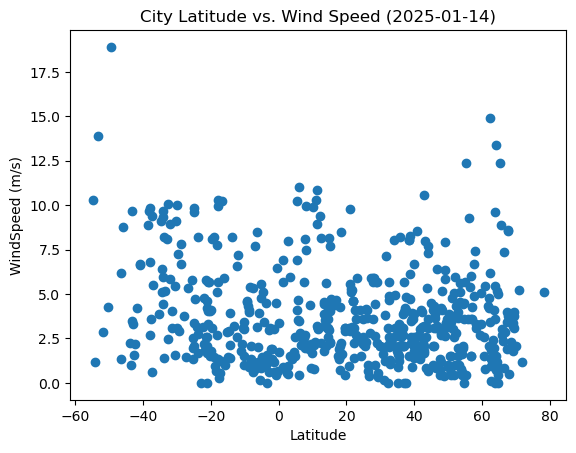

In [92]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
med_date = datetime.datetime.fromtimestamp(city_data_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({day})')
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (m/s)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Define a function to create Linear Regression plots
# x_values = []
# y_values = []
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [94]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hafar al-batin,28.4328,45.9708,7.32,70,0,1.03,SA,1736901583
1,olonkinbyen,70.9221,-8.7187,-0.37,99,100,5.21,SJ,1736901661
2,berdigestyakh,62.0989,126.6992,-30.52,88,100,4.79,RU,1736901661
5,kottayam,9.5833,76.5167,22.69,88,100,0.84,IN,1736901661
6,bonthe,7.5264,-12.5050,25.01,81,33,2.55,SL,1736901661


In [95]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,margaret river,-33.9500,115.0667,18.25,53,55,1.39,AU,1736901588
4,saint-philippe,-21.3585,55.7679,25.85,81,95,5.80,RE,1736901661
8,ushuaia,-54.8000,-68.3000,8.81,71,75,10.29,AR,1736901426
9,flying fish cove,-10.4217,105.6791,24.82,88,100,3.09,CX,1736901662
10,punta arenas,-53.1500,-70.9167,12.06,54,0,13.89,CL,1736901445


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.6555882147777206


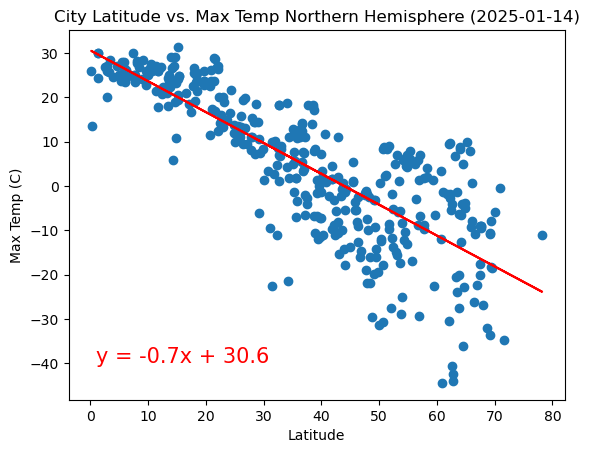

In [96]:
# Linear regression on Northern Hemisphere Temp
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(northern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-40),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temp Northern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r^2 value is: 0.3280977502389306


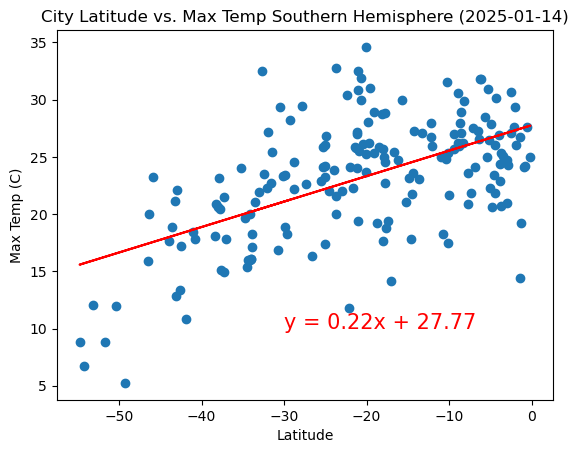

In [97]:
# Linear regression on Southern Hemisphere Temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(southern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temp Southern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regression test here is comparing the realtionship between latitude and max temperature in cities as they get further from the equator (northern hemisphere cities) or closer to the equator (southern hemisphere cities). The negative slope of the linear regression in the northern hemisphere plot shows that temperature drops as latitude moves further from the equator and the positive slope of the linear regression in the southern hemisphere plot indicates that temperature increases for cities closer to the equator. The relationship of latitude and temperature is better modeled in the northern hemisphere because the r^2 value is closer to 1, whereas the r^2 value of the regression test for the southern hemisphere plot is closer to 0, however neither value is especially strong or weak. We can also see that the slope of the line in the northern hemisphere plot is steeper, which means that the temperature changes faster as latitude changes than in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.11355694584478068


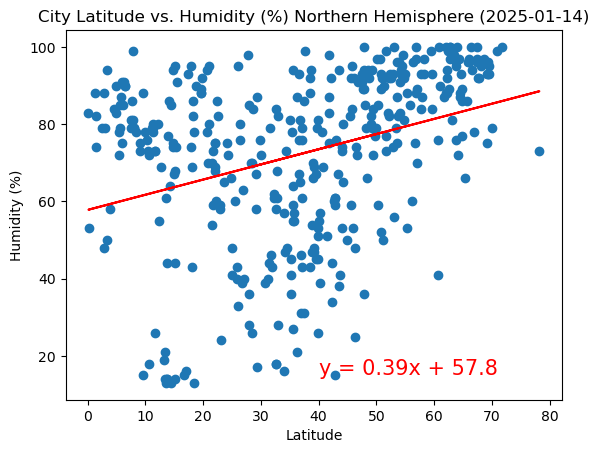

In [98]:
# Linear regression on Northern Hemisphere Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(northern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) Northern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r^2 value is: 0.09936769529160944


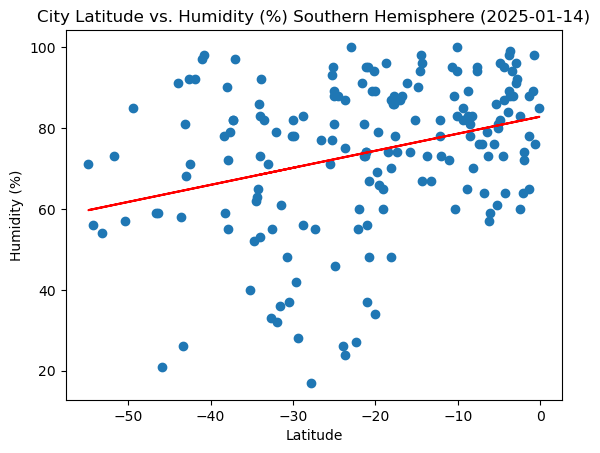

In [99]:
# Linear regression on Southern Hemisphere Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(southern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) Southern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In juxtaposition to the northern and souther difference in slope in the max temperature plots, we see that both northern and southern hemispheres have a positive slope in their linear correlation. This means that humidity increases in the nothern hemisphere as we get further from the equator and it increases in the southern hemisphere as we get closer to the equator. The relationship is similar, as seen by the similar slope values, however the data is much better modeled in the northern hemisphere as seen by the r^2 value. Both r^2 values are relatively low and do not indicate a strong prediction for modeling the data.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.04370462233552162


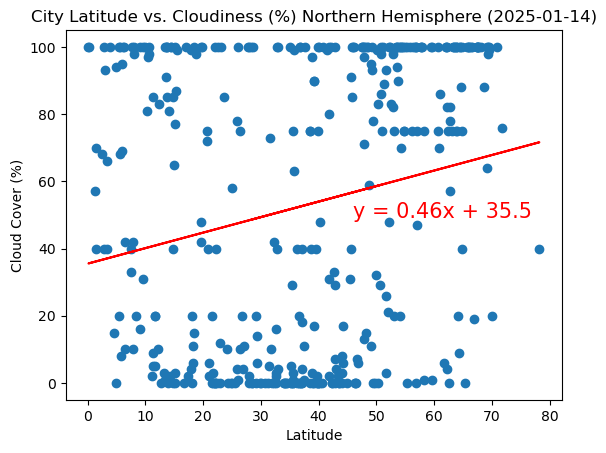

In [101]:
# Linear regression on Northern Hemisphere Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(northern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,49),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) Northern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r^2 value is: 0.019014336274127092


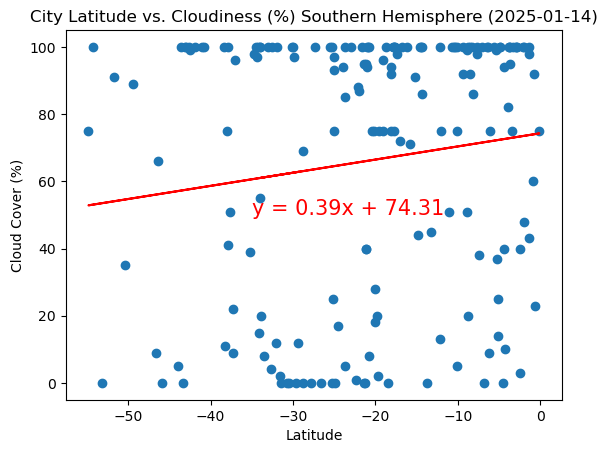

In [102]:
# Linear regression on Southern Hemisphere Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(southern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) Southern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** These plots again show a positive relationship in both the northern and souther hemispheres, which means that cloud cover increases as we get further from the equator in the northern hemisphere and as we get closer to the equator in the southern hemisphere. The relationship is stronger in the southern hemisphere as seen by the larger slope of the line. We can see again that both of these models are quite weak in predicting the data, as the r^2 values are again quite low for both of these plots.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.0010517930269648874


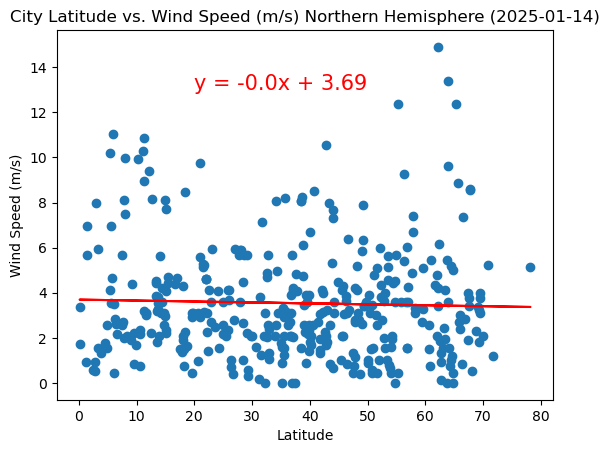

In [103]:
# Linear regression on Northern Hemisphere Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(northern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,13),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (m/s) Northern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r^2 value is: 0.18239657009697816


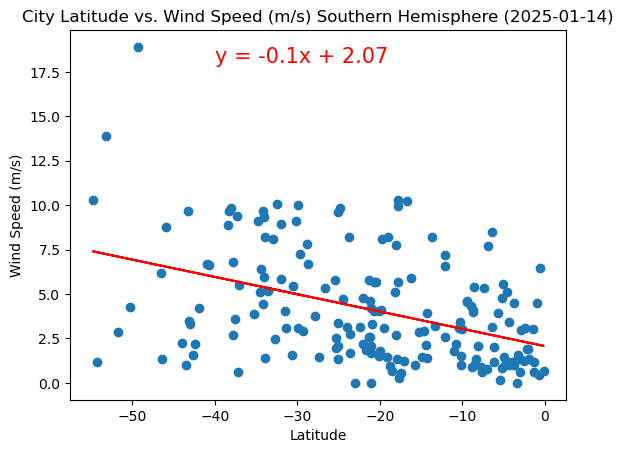

In [104]:
# Linear regression on Southern Hemisphere Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r^2 value
print(f'The r^2 value is: {np.square(rvalue)}')

# Plot Figure
plt.scatter(x_values,y_values)
med_date = datetime.datetime.fromtimestamp(southern_hemi_df['Date'].median())
day = med_date.strftime("%Y-%m-%d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,18),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (m/s) Southern Hemisphere ({day})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship between latitude and wind speed in both the northern and southern hemispheres is basically non-existent. Both linear regressions have a slope of close to 0, which indicates that wind speed does not change as you get further from or closer to the equator. The r^2 value for both plots is also very close to zero, which indicates that these models are quite weak in predicting wind speed from latitude.